In [218]:
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import numpy as np

In [219]:
raw_counts = pd.read_csv(r'D:\Personal\Academics\UTA\3rd semester\Bioinformatics\Project\normalized_counts_vst.csv', index_col=0)
raw_counts = raw_counts.T

In [220]:
metadata_file = r"D:\Personal\Academics\UTA\3rd semester\Bioinformatics\Project\metadata.csv" 
metadata = pd.read_csv(metadata_file, sep=',')

In [221]:
df = pd.merge(raw_counts, metadata, left_index=True, right_on='Sample_ID')
df = df.drop(['Sample_ID','Clade', 'Dominant' ],axis=1)
df

,A0A011QK89,A0A023I7E1,A0A067XMP1,A0A067YMX8,A0A075HNX4,A0A0A0RM07,A0A0B4KGY6,A0A0B6VQ48,A0A0B7P9G0,A0A0G2JDV3,...,S8GJB7,V6CLA2,W0LYS5,W0TIW1,W7JLR6,W7JX98,W7K9M0,W7NDQ0,X1WER2,Host
0,3.907570,1.620841,3.004398,2.703474,2.986870,2.241169,2.521235,3.692186,3.004398,6.353335,...,1.620841,1.856850,3.104000,3.119761,3.371791,1.856850,2.359892,4.727864,4.686284,MCAV
1,5.441870,1.620841,2.535626,3.657173,3.478619,2.503367,3.106804,4.619353,4.672777,7.503357,...,1.869137,2.976699,3.426356,3.944844,4.232551,2.173351,2.273015,6.026444,6.010146,MCAV
2,5.331988,1.620841,3.125354,3.570151,3.630813,2.891829,2.891829,4.273808,5.297177,7.510740,...,2.346861,3.570151,2.414528,3.368204,4.119319,2.729975,2.684824,5.862211,5.935485,MCAV
3,5.619051,1.974893,2.605541,3.519751,2.948207,2.404832,3.137391,4.295079,4.585000,7.673688,...,2.544092,2.905994,2.544092,3.662709,4.478651,1.620841,2.477620,6.219767,5.997715,MCAV
4,5.021363,1.620841,2.913924,3.443582,3.627241,2.838415,2.937903,4.301555,4.861119,7.184987,...,2.152548,3.050253,2.454656,3.666083,3.930574,2.567736,2.214481,5.709837,5.492568,MCAV
5,5.048947,2.155858,3.438346,3.396352,3.646922,2.673509,3.186723,4.458022,4.726426,7.370989,...,2.537347,3.284503,3.079813,3.646922,3.871036,2.630471,1.930909,5.759675,5.397468,MCAV
6,4.732517,2.933164,6.922549,1.620841,2.264749,5.577888,4.111295,3.552054,5.850194,7.033953,...,3.466950,2.524211,2.650763,1.620841,4.438061,3.110643,2.650763,5.622068,5.640270,OANN
7,4.913929,3.388497,6.696605,3.372314,2.458468,5.637551,5.202182,5.379956,5.686338,6.937930,...,2.761752,4.049790,3.234313,1.889072,4.834389,4.641766,2.572031,5.402069,5.521292,OANN
8,4.576992,2.793144,7.024587,1.620841,2.263097,5.272499,4.111187,3.294326,5.740097,6.850679,...,3.205545,1.620841,2.715986,1.800330,3.873575,2.729293,2.688782,5.488106,5.394268,OANN
9,4.538450,3.150154,7.086066,1.620841,2.208325,5.595623,4.221666,3.731320,6.015547,7.021467,...,3.353942,2.702051,2.901160,1.620841,4.129572,2.901160,3.826660,5.545712,5.608473,OANN


In [222]:
df['Host'] = (df['Host']=='OANN').astype(int)

In [223]:
y = df['Host']
X = df.drop(['Host'],axis=1)

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=41)

Partial Least Square Cross-validated Accuracy: 0.90625
Partial Least Square Test Set Accuracy: 0.8888888888888888
Error Rate for Partial Least Square : 0.11111111111111116
Top Genes for PLS Method:  Index(['O94264', 'Q54GE3'], dtype='object')


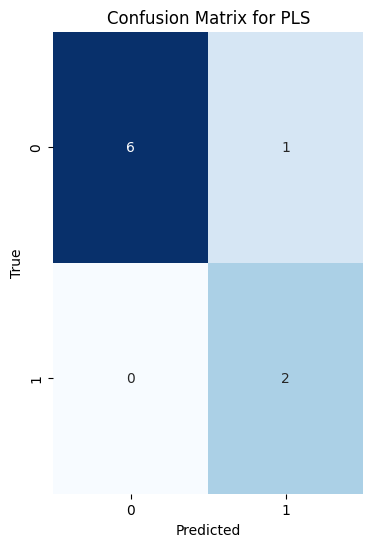

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.67      1.00      0.80         2

    accuracy                           0.89         9
   macro avg       0.83      0.93      0.86         9
weighted avg       0.93      0.89      0.90         9



In [225]:
pls = PLSRegression(n_components=6) 
y_pred_cv = cross_val_predict(pls, X_train, y_train, cv=5)
threshold = 0.5 
y_pred_cv = (y_pred_cv > threshold).astype(int)
cv_accuracy = accuracy_score(y_train, y_pred_cv)
print("Partial Least Square Cross-validated Accuracy:", cv_accuracy)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
test_accuracy = accuracy_score(y_test, y_pred_binary)
print("Partial Least Square Test Set Accuracy:", test_accuracy)
error_rate = 1 - test_accuracy
print(f"Error Rate for Partial Least Square : {error_rate}")
loadings_component_1 = pls.x_weights_[:, 0]
top_gene_indices = loadings_component_1.argsort()[-2:][::-1]
top_genes = X_train.columns[top_gene_indices]
print("Top Genes for PLS Method: ", top_genes)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(4, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for PLS')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))


In [226]:
lr = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Cross-validated Accuracy:", cv_scores.mean())
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Test Set Accuracy:", test_accuracy)

Logistic Regression Cross-validated Accuracy: 0.9380952380952381
Logistic Regression Test Set Accuracy: 1.0


In [227]:
svm = SVC(kernel='poly',degree=5)
cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print("Support Vector Machine Cross-validated Accuracy:", cv_scores.mean())
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Support Vector Machine Test Set Accuracy:", test_accuracy)

Support Vector Machine Cross-validated Accuracy: 0.9380952380952381
Support Vector Machine Test Set Accuracy: 0.8888888888888888


In [228]:
lda = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(lda, X_train, y_train, cv=5, scoring='accuracy')
print("Linear Discrimiant Analysis Cross-validated Accuracy:", cv_scores.mean())
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Linear Discrimiant Analysis Test Set Accuracy:", test_accuracy)

Linear Discrimiant Analysis Cross-validated Accuracy: 0.8761904761904763
Linear Discrimiant Analysis Test Set Accuracy: 1.0


In [229]:
qda = QuadraticDiscriminantAnalysis()
n_components = min(X_train.shape[0], X_train.shape[1]) 
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
cv_scores = cross_val_score(qda, X_train_pca, y_train, cv=5, scoring='accuracy')
print("Quadratic Discrimiant Analysis Cross-validated Accuracy:", cv_scores.mean())
qda.fit(X_train_pca, y_train)
y_pred = qda.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)
print("Quadratic Discrimiant Analysis Test Set Accuracy:", test_accuracy)

Quadratic Discrimiant Analysis Cross-validated Accuracy: 0.7190476190476189
Quadratic Discrimiant Analysis Test Set Accuracy: 0.7777777777777778


c:\Users\karav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\karav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\karav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\karav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\karav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\karav\AppData\Local\Programs\Python\Pytho